In [1]:
import numpy as np
from tqdm import tqdm
from gp import Node, Symreg_gp, Individual

In [2]:
def true_f(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5

In [3]:
import numpy as np

# Get all numpy ufunc callable
ufuncs = [obj for _, obj in np.__dict__.items() if isinstance(obj, np.ufunc)]

# Displau ufuncs list
print(len(ufuncs), ufuncs)

valid_ufuncs = Symreg_gp.get_valid_ufuncs()
print(len(valid_ufuncs), valid_ufuncs)

104 [<ufunc 'absolute'>, <ufunc 'absolute'>, <ufunc 'arccos'>, <ufunc 'arccosh'>, <ufunc 'add'>, <ufunc 'arccos'>, <ufunc 'arccosh'>, <ufunc 'arcsin'>, <ufunc 'arcsinh'>, <ufunc 'arctan'>, <ufunc 'arctan2'>, <ufunc 'arctanh'>, <ufunc 'arcsin'>, <ufunc 'arcsinh'>, <ufunc 'arctan'>, <ufunc 'arctanh'>, <ufunc 'arctan2'>, <ufunc 'bitwise_and'>, <ufunc 'bitwise_count'>, <ufunc 'invert'>, <ufunc 'left_shift'>, <ufunc 'invert'>, <ufunc 'bitwise_or'>, <ufunc 'right_shift'>, <ufunc 'bitwise_xor'>, <ufunc 'cbrt'>, <ufunc 'ceil'>, <ufunc 'conjugate'>, <ufunc 'conjugate'>, <ufunc 'copysign'>, <ufunc 'cos'>, <ufunc 'cosh'>, <ufunc 'deg2rad'>, <ufunc 'degrees'>, <ufunc 'divide'>, <ufunc 'divmod'>, <ufunc 'equal'>, <ufunc 'exp'>, <ufunc 'exp2'>, <ufunc 'expm1'>, <ufunc 'fabs'>, <ufunc 'float_power'>, <ufunc 'floor'>, <ufunc 'floor_divide'>, <ufunc 'fmax'>, <ufunc 'fmin'>, <ufunc 'fmod'>, <ufunc 'frexp'>, <ufunc 'gcd'>, <ufunc 'greater'>, <ufunc 'greater_equal'>, <ufunc 'heaviside'>, <ufunc 'hypot'>, 

16.0


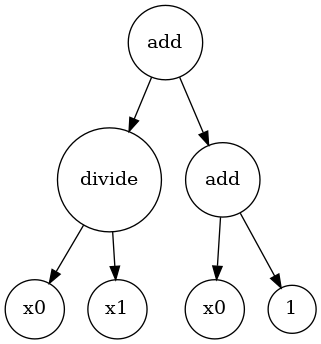

In [4]:
tree = Node(np.add, [Node(np.divide, [Node('x0'), Node('x1')]), Node(ufuncs[4], [Node('x0'), Node(1)])])
x = [10, 2]
print(tree(x0=x[0], x1=x[1]))
tree.draw()

In [5]:
problem = np.load('problem_0.npz')
X = problem['x']
Y = problem['y']
print(X.shape)
print(Y.shape)
print(X)
print(X[0][0], X[1][0])
print(Y[0])

(2, 1000)
(1000,)
[[-0.7738098   0.51676618  0.88205805 ... -1.30573667  1.1988571
  -2.90838054]
 [ 0.01094229  0.04800035  0.77226547 ...  0.27997803 -0.68435416
   0.04383484]]
-0.7738097958836625 0.010942289526150617
-0.771621381650198


In [6]:
a = Symreg_gp(len(X), Y, 10, 30, 6)
a.train(True)

In [7]:
for _ in tqdm(range(1000)):
    a(X.T)
    a.update_mse()

  0%|          | 0/1000 [00:00<?, ?it/s]/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in log10
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in arcsin
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in log2
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in log
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in power
  return value(*_args)
  0%|          | 2/1000 [00:00<03:01,  5.49it/s]/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in log1p
  return value(*_args)
/home/loiodilu/polito/computational_in

/home/loiodilu/polito/computational_intelligence/project/gp/node.py:88: RuntimeWarning: invalid value encountered in log
  return operator(*_args)
/home/loiodilu/polito/computational_intelligence/project/gp/node.py:20: RuntimeWarning: invalid value encountered in log10
  return value(*_args)


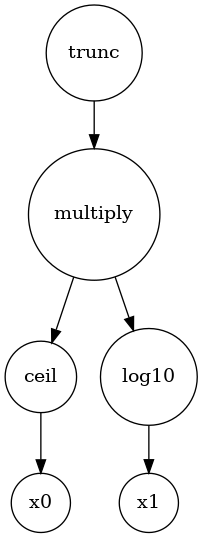

[1000000.0, np.float64(785.0053982061697), np.float64(1.0933904902113678), np.float64(1.0933904902113678), np.float64(4568.761295425768), np.float64(329.24759830574084), np.float64(408.0526052707197), np.float64(1.0933904902113678), np.float64(1.0933904902113678), 1000000.0]
200609.54404591693
1.0933904902113678


In [9]:
a(X.T)
mean_square_errors = a.update_mse(draw_fittest=True)
print(mean_square_errors)
print(np.mean(mean_square_errors))
print(np.min(mean_square_errors))